In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as snb
import tensorflow as tf
from tensorflow import keras
from scipy import stats as st
from scipy.signal  import resample
from scipy.fft import fft, fftfreq

c:\Users\pveso\anaconda3\envs\ai_dev\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\pveso\anaconda3\envs\ai_dev\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\pveso\anaconda3\envs\ai_dev\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\pveso\anaconda3\envs\ai_dev\lib\site-packages\tensorflow\pyth

In [2]:
# Returns wether PC os is linux or other
def isLinux():
    return os.name == 'posix'

In [3]:
data_filepath = ''

if isLinux():
    pass
else:
    data_filepath = 'C:\\Users\\pveso\\Documents\\heart_attack_analysis\\data\\vpd_hep_measures.xlsx'

In [4]:
df_excel = pd.read_excel(data_filepath)

In [5]:
df_excel.head()

,pos 0 min 4.89,Unnamed: 1,neg 0min 3.14,Unnamed: 3,pos 4.89,Unnamed: 5,neg 3.31,Unnamed: 7,pos 4.89.1,Unnamed: 9,...,pos 4.6,Unnamed: 33,neg 3.12,Unnamed: 35,pos 4.17,Unnamed: 37,neg 3.13,Unnamed: 39,pos 4.9,Unnamed: 41
0,V,µA,V,µA,V,µA,V,µA,V,µA,...,V,µA,V,µA,V,µA,V,µA,V,µA
1,-0.699948,52.2196,-0.699948,62.282085,-0.699948,64.40711,-0.699948,55.21965,-0.699948,62.282085,...,-0.699948,52.594423,-0.699948,62.094688,-0.699948,61.907291,-0.699948,60.719728,-0.699948,58.219671
2,-0.689948,43.5944,-0.689948,53.157091,-0.689948,55.469513,-0.689948,47.219515,-0.689948,53.781986,...,-0.689948,43.59436,-0.689948,52.594423,-0.689948,55.094481,-0.689948,52.969456,-0.689948,50.406933
3,-0.679948,38.7819,-0.679948,49.21937,-0.679948,52.09446,-0.679948,44.219494,-0.679948,50.657034,...,-0.679948,40.531874,-0.679948,47.96958,-0.679948,52.531958,-0.679948,48.781872,-0.679948,47.469378
4,-0.669948,36.0317,-0.669948,46.906948,-0.669948,49.782038,-0.669948,42.156935,-0.669948,48.594475,...,-0.669948,37.406921,-0.669948,45.969486,-0.669948,52.031994,-0.669948,47.219515,-0.669948,45.219421


In [6]:
potential = df_excel.iloc[1:, 2]
potential_df = potential.astype(np.float32)

In [7]:
potential_df.describe()

count    141.000000
mean       0.000062
std        0.408479
min       -0.699948
25%       -0.349943
50%        0.000062
75%        0.350068
max        0.700073
Name: neg 0min 3.14, dtype: float64

In [8]:
# Verificando se no dataset temos colunas not a number
df_excel.isna().any().sum()

0

In [9]:
# Verificando se há algum valor null
df_excel.isnull().any().sum()

0

In [10]:
positives = df_excel.iloc[1:,5::4]
negatives = df_excel.iloc[1:, 3::4]

In [11]:
positives.head()

,Unnamed: 5,Unnamed: 9,Unnamed: 13,Unnamed: 17,Unnamed: 21,Unnamed: 25,Unnamed: 29,Unnamed: 33,Unnamed: 37,Unnamed: 41
1,64.40711,62.282085,64.969778,53.03216,52.282095,57.657003,50.15707,52.594423,61.907291,58.219671
2,55.469513,53.781986,60.657263,44.531822,43.469429,47.157049,40.469408,43.59436,55.094481,50.406933
3,52.09446,50.657034,59.157133,41.781902,41.156769,43.031931,37.031889,40.531874,52.531958,47.469378
4,49.782038,48.594475,61.282158,39.531946,38.969278,40.594339,34.281731,37.406921,52.031994,45.219421
5,50.344467,48.407078,64.969778,38.906813,37.969351,39.90674,33.156633,36.844254,53.594589,45.406818


In [12]:
negatives.head()

,Unnamed: 3,Unnamed: 7,Unnamed: 11,Unnamed: 15,Unnamed: 19,Unnamed: 23,Unnamed: 27,Unnamed: 31,Unnamed: 35,Unnamed: 39
1,62.282085,55.21965,59.032202,68.344831,61.782122,63.782215,64.53228,62.844753,62.094688,60.719728
2,53.157091,47.219515,49.719572,59.094667,52.531958,55.094481,60.344696,55.657148,52.594423,52.969456
3,49.21937,44.219494,46.219349,54.969549,49.21937,50.969601,58.594704,50.969601,47.96958,48.781872
4,46.906948,42.156935,44.094324,52.282095,46.531916,48.65694,60.032129,48.719406,45.969486,47.219515
5,46.219349,41.094303,42.594433,51.594496,44.781923,46.594381,63.094616,47.719479,45.844316,45.907021


In [13]:
# Transformando os positivos e negativos em float
positives_df = positives.astype(np.float32)
negatives_df = negatives.astype(np.float32)

In [14]:
positives_df.describe()

,Unnamed: 5,Unnamed: 9,Unnamed: 13,Unnamed: 17,Unnamed: 21,Unnamed: 25,Unnamed: 29,Unnamed: 33,Unnamed: 37,Unnamed: 41
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,57.348587,55.370586,55.955711,47.686943,47.436497,51.489014,46.037643,49.682873,57.120964,53.657890
std,12.202006,11.161823,13.231521,13.436898,14.288779,14.618992,15.399408,15.540482,15.575661,16.222013
min,40.453743,40.209984,37.284946,30.084824,29.247332,34.078644,27.416039,31.372356,39.459969,35.672424
25%,46.860100,45.572567,44.228790,35.641171,35.547424,38.969276,32.628632,36.897446,44.585060,40.572502
50%,55.285217,54.616451,53.753948,45.916321,45.335079,49.485134,45.122551,47.416351,53.416443,49.822639
75%,66.485382,62.360336,64.969780,56.003975,56.297729,58.772778,54.372715,57.454014,65.422867,61.529064
max,86.554459,86.473206,90.523270,85.848190,90.967010,97.910881,92.292046,98.373390,110.498573,110.667328


In [15]:
negatives_df.describe()

,Unnamed: 3,Unnamed: 7,Unnamed: 11,Unnamed: 15,Unnamed: 19,Unnamed: 23,Unnamed: 27,Unnamed: 31,Unnamed: 35,Unnamed: 39
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,54.940765,50.000107,53.841366,59.348785,56.237560,55.570103,57.872967,58.942280,57.096931,56.249943
std,11.761581,13.304927,13.617917,11.098723,12.366553,11.318823,15.140470,14.952596,15.052420,12.598386
min,40.041233,32.053612,36.009933,44.085049,39.109970,40.728737,37.528706,41.522503,38.553715,41.166260
25%,45.285057,38.066196,42.416264,49.991394,45.156956,45.885086,44.278812,47.719479,44.997574,45.907021
50%,52.666428,48.760128,51.841427,57.804012,54.522705,53.735184,55.703972,55.657150,54.691460,53.835201
75%,61.310314,58.522774,61.610317,66.691635,63.391590,62.847828,68.704178,66.160393,64.110352,62.379074
max,94.442055,82.166885,94.660828,89.191986,92.135788,88.779472,100.220200,112.473587,105.679749,98.348381


In [16]:
def saveJson(status, number, data):
    filename = f"C:\\Users\\pveso\\Documents\\heart_attack_analysis\\data\\JSON\\Hep\\{status}_{number}.json"
    file = open(filename, 'w') 
    file.write(data) 
    file.close() 

In [73]:
# Salvando os dados em Json formato
import json
# Percorrendo a coluna dos valores positivos
for i in range(positives_df.shape[1]):
    
    read_current = positives_df.iloc[:,i].values
    jsonList = []
    sum = 0
    
    for j in range(read_current.shape[0]):
        c = read_current[j]
        v = potential_df.values[j]
   
        jsonList.append(json.dumps({'V': str(v), 'I': str(c)}, indent=2))
        sum += 1
        
    print(f"Lines Json: {sum}")
    
    jsonObject = json.dumps({'readings': jsonList})
    saveJson("pos", i, jsonObject)
    
for i in range(negatives_df.shape[1]):
    
    read_current = negatives_df.iloc[:,i].values   
    jsonList = []
    sum = 0
    
    for j in range(read_current.shape[0]):
        c = read_current[j]
        v = potential_df.values[j]
   
        jsonList.append(json.dumps({'V': str(v), 'I': str(c)}, indent=2))
        sum += 1
    
    print(f"Lines Json: {sum}")
    jsonObject = json.dumps({'readings': jsonList})
    saveJson("neg", i, jsonObject)
    
    

Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141
Lines Json: 141


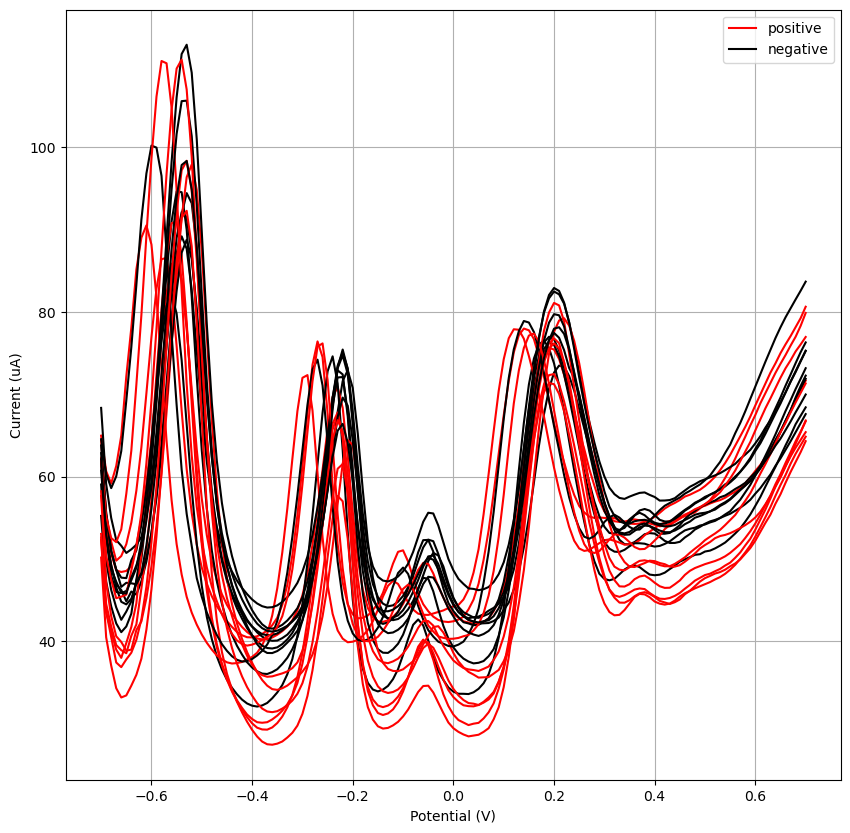

In [17]:
# plotando todos os positivos como vermelho e todos os negativos em preto
plt.figure(figsize=(10,10))
for i in range(positives_df.shape[1]):
    positive = positives_df.iloc[:,i]
    negative = negatives_df.iloc[:,i]
    if (i == 0 ):
        plt.plot(potential_df, positive, color = 'r', label = 'positive')
        plt.plot(potential_df, negative, color = 'black', label = 'negative')
    else:
        plt.plot(potential_df, positive, color = 'r')
        plt.plot(potential_df, negative, color = 'black') 
plt.ylabel('Current (uA)')
plt.xlabel('Potential (V)')
plt.legend()
plt.grid()
plt.show()

In [18]:
#Calculando o tempo
Ei = potential.values[0]
Ef = potential.values[len(potential) - 1]
Sr = 0.01
# Number of sample points
N = positives_df.shape[0]
T = (Ef - Ei) / Sr
t = np.linspace(0, T, N)
dt = np.diff(t)[0]
print(f'Tempo total = {T} s')
print(f'Number of Samples = {N} s')
print(f'E inicial = {Ei} s')
print(f'E final = {Ef} s')
print(f'dt = {dt}')


Tempo total = 140.00215530395508 s
Number of Samples = 141 s
E inicial = -0.6999483108520508 s
E final = 0.7000732421875 s
dt = 1.0000153950282507


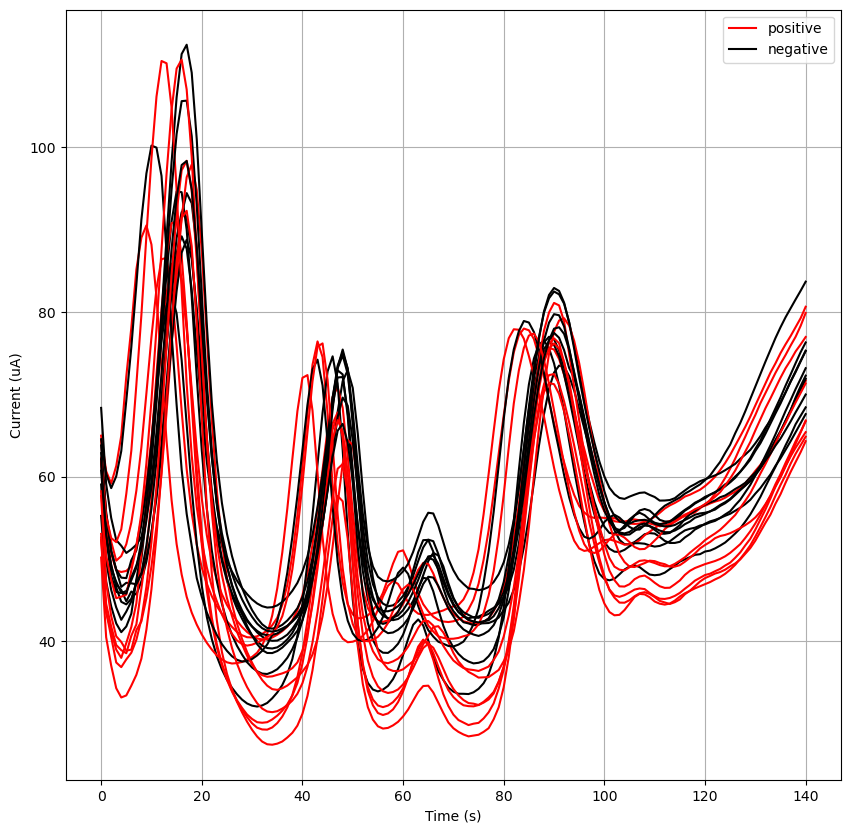

In [19]:
# Plotando as curvas em função do tempo
# plotando todos os positivos como vermelho e todos os negativos em preto
plt.figure(figsize=(10,10))
for i in range(positives_df.shape[1]):
    positive = positives_df.iloc[:,i]
    negative = negatives_df.iloc[:,i]
    if (i == 0 ):
        plt.plot(t, positive, color = 'r', label = 'positive')
        plt.plot(t, negative, color = 'black', label = 'negative')
    else:
        plt.plot(t, positive, color = 'r')
        plt.plot(t, negative, color = 'black') 
plt.ylabel('Current (uA)')
plt.xlabel('Time (s)')
plt.legend()
plt.grid()
plt.show()

In [20]:
fft_positives = np.zeros(shape = (N//2, positives_df.shape[1]))
fft_negatives = np.zeros(shape = (N//2, negatives_df.shape[1]))
x_frequency = fftfreq(N, dt)[:N//2]

for i in range(positives_df.shape[1]):
    fft_positives[:,i] = ((2.0/N) * np.abs(fft(positives_df.values[:,i])[0:N//2]))
    fft_negatives[:,i] = ((2.0/N) * np.abs(fft(negatives_df.values[:,i])[0:N//2]))
    


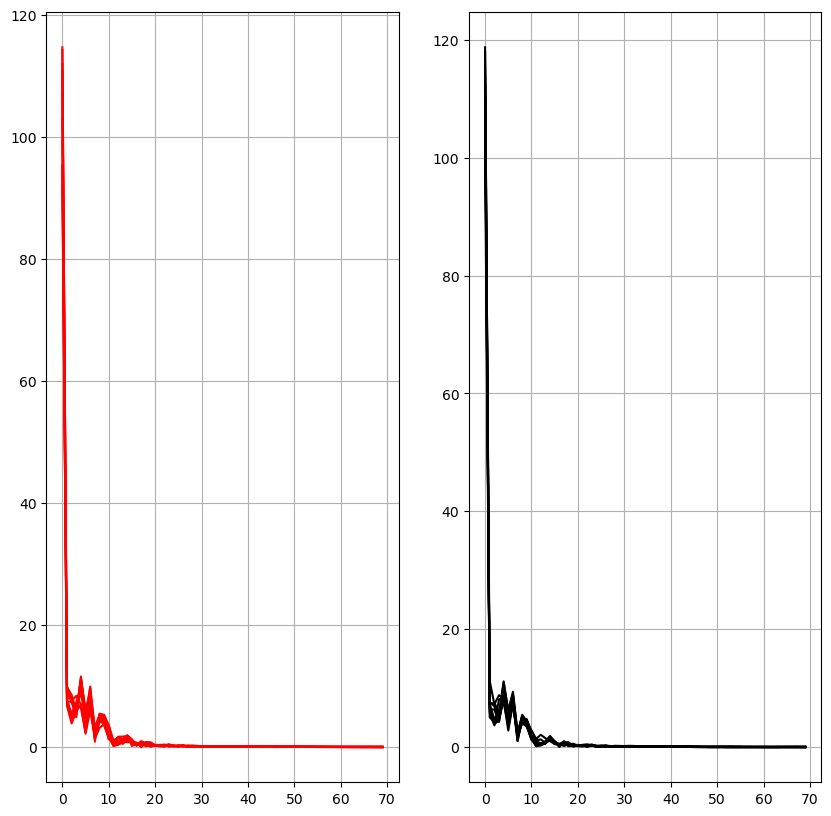

In [21]:

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,10))
for i in range(positives_df.shape[1]):
    #ax[0].plot(x_frequency[0:], 2.0/N * np.abs(fft_positives[:,i][0:N//2]), color = 'r')
    #ax[1].plot(x_frequency[0:], 2.0/N * np.abs(fft_negatives[:,i][0:N//2]), color = 'black')
    ax[0].plot(fft_positives[:,i], color = 'r')
    ax[1].plot(fft_negatives[:,i], color = 'black')
ax[0].grid()
ax[1].grid()
plt.show()

In [24]:
import Hep.inference_hep as inf
import os
import json

hep = inf.Hep()
filepath = "C:\\Users\\pveso\\Documents\\heart_attack_analysis\\data\\JSON\\Hep"
files = os.listdir(filepath)
#fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,10))
neg_index = 0
pos_index = 0
error = 0
error_fourier = 0
for j, file in enumerate(files):
    
    if ('.json' in file):
        print(file)
        json_ = (hep.getJsonFromFile(os.path.join(filepath, file)))
        json_readings = json_["readings"]
        potential = []
        current = []
        current_original = []
        
        if ('pos' in file):
            original = positives_df.values[:,pos_index]
            fourier_original = 2.0/N * np.abs(fft(original)[0:N//2])
            pos_index += 1
        elif ('neg' in file):
            original = negatives_df.values[:,neg_index]
            fourier_original = 2.0/N * np.abs(fft(original)[0:N//2])
            neg_index += 1
        
        for i in range(len(json_readings)):
            sample = json.loads(json_readings[i])
            v = np.float32(sample["V"])
            c = np.float32(sample["I"])
            o = original[i]
            potential.append(v)
            current.append(c)
            current_original.append(o)
            
            if (abs(o - c) > 0.000001):
                error += 1
                
        current_numpy = np.array(current)
        print(hep.predict_data(current_numpy))

        # Comparando os coeficientes da fft de ambas as funções
        fourier = fft(current_numpy)
        fourier = 2.0/N * abs(fourier[0:N//2])
        fourier_o = hep.transformFourier(np.array(current_original))
        
        for i in range(len(fourier)):
            fj = fourier[i]
            fo = fourier_original[i]
            foo = fourier_o[i]
            
            #print(fj, fo, foo)
            if (abs(fo - fj) > 0.00001):
                error_fourier += 1
                
print(error)
print(error_fourier)
            
            
        #if ('pos' in file):
            #ax[0].plot(hep.transformFourier(current), color = 'r')
       # elif ('neg' in file):
            #ax[1].plot(hep.transformFourier(current), color = 'black')
#ax[0].grid()
#ax[1].grid()
#plt.show()

neg_0.json
                0
count   70.000000
mean     2.387737
std     13.159870
min      0.005693
25%      0.036582
50%      0.083844
75%      0.333509
max    109.881546
Features
[2.3877367973327637, 13.159870147705078, 0.005693345796316862, 0.036581793799996376, 0.0838438831269741, 0.33350908756256104, 109.88154602050781]
Result: 0
0
neg_1.json
                0
count   70.000000
mean     2.377383
std     12.012026
min      0.042012
25%      0.078390
50%      0.117763
75%      0.647267
max    100.000191
Features
[2.377382516860962, 12.012025833129883, 0.04201195389032364, 0.07839039340615273, 0.1177629604935646, 0.6472669169306755, 100.00019073486328]
Result: 0
0
neg_2.json
                0
count   70.000000
mean     2.516692
std     12.921431
min      0.045679
25%      0.079435
50%      0.148204
75%      0.540861
max    107.682762
Features
[2.5166919231414795, 12.921430587768555, 0.045679397881031036, 0.07943542301654816, 0.14820391684770584, 0.5408614948391914, 107.6827621459961

In [107]:
positive_fft_df = pd.DataFrame(fft_positives)
negatives_fft_df = pd.DataFrame(fft_negatives)

In [108]:
describe_positives = positive_fft_df.describe()
describe_positives

,0,1,2,3,4,5,6,7,8,9
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,2.551973,2.382556,2.559735,2.323185,2.370625,2.474154,2.383860,2.486415,2.749640,2.654859
std,13.723578,13.249914,13.412711,11.469501,11.429008,12.394699,11.132262,11.990562,13.728072,12.935666
min,0.007828,0.019801,0.063253,0.032374,0.029868,0.003622,0.044960,0.049060,0.060662,0.038032
25%,0.101355,0.059888,0.113382,0.071956,0.073661,0.052156,0.080257,0.094055,0.094247,0.084881
50%,0.152781,0.106937,0.138446,0.123592,0.128185,0.130392,0.154984,0.140155,0.144433,0.140481
75%,0.698019,0.511137,0.390712,0.564222,0.547430,0.491138,0.453622,0.394946,0.651985,0.432501
max,114.697182,110.741188,111.911415,95.373878,94.872978,102.978027,92.075294,99.365746,114.241943,107.315781


In [109]:
describe_negatives = negatives_fft_df.describe()
describe_negatives

,0,1,2,3,4,5,6,7,8,9
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,2.387736,2.377383,2.516692,2.473245,2.487154,2.378817,2.751527,2.710337,2.670486,2.466382
std,13.159870,12.012028,12.921432,14.196111,13.471023,13.302743,13.895236,14.155727,13.721335,13.484075
min,0.005693,0.042012,0.045679,0.005128,0.044800,0.009016,0.098216,0.049222,0.027468,0.029250
25%,0.036582,0.078390,0.079435,0.039721,0.088341,0.038756,0.135793,0.073319,0.048947,0.044332
50%,0.083844,0.117763,0.148204,0.090610,0.160346,0.094037,0.185317,0.110715,0.103657,0.107939
75%,0.333509,0.647267,0.540861,0.462593,0.401028,0.421710,0.561364,0.331576,0.430077,0.307257
max,109.881546,100.000191,107.682762,118.697556,112.475105,111.140205,115.745911,117.884552,114.193893,112.499893


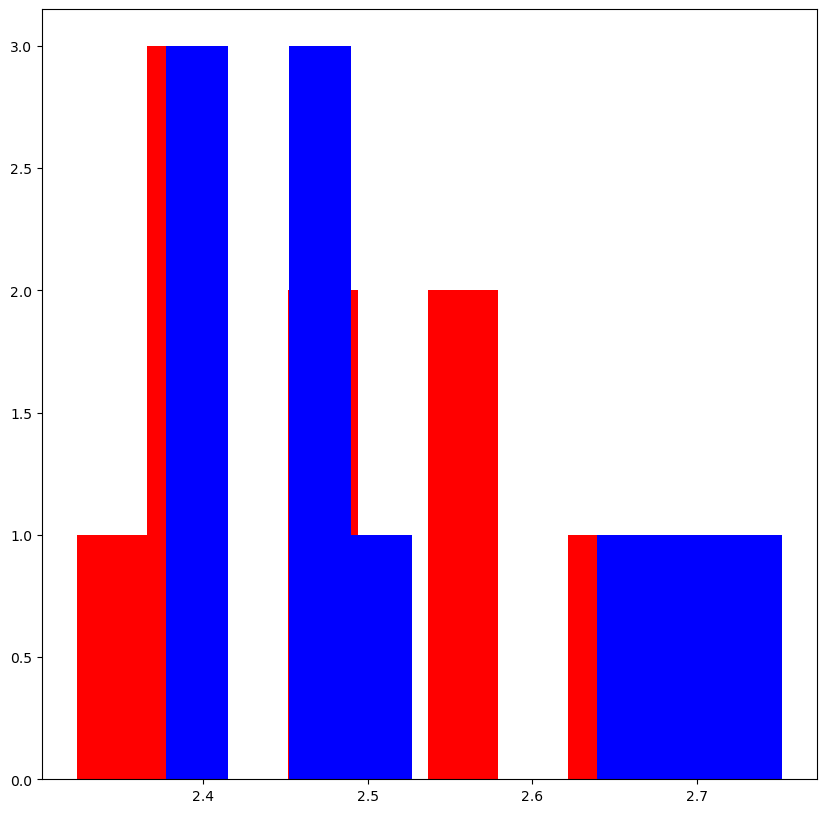

In [110]:
# Plotando as médias dos coeficientes
fig = plt.figure(figsize=(10,10))
plt.hist(describe_positives.iloc[1,:], color='r')
plt.hist(describe_negatives.iloc[1,:], color='b')
plt.show()

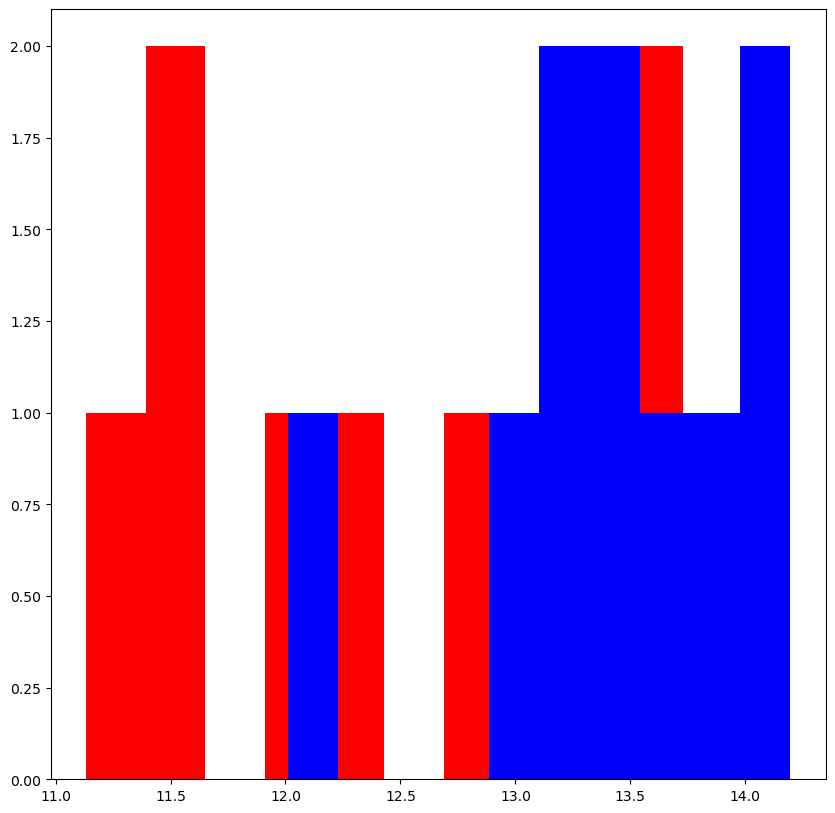

In [111]:
# Plotando o valor mínimo
fig = plt.figure(figsize=(10,10))
plt.hist(describe_positives.iloc[2,:], color='r')
plt.hist(describe_negatives.iloc[2,:], color='b')
plt.show()

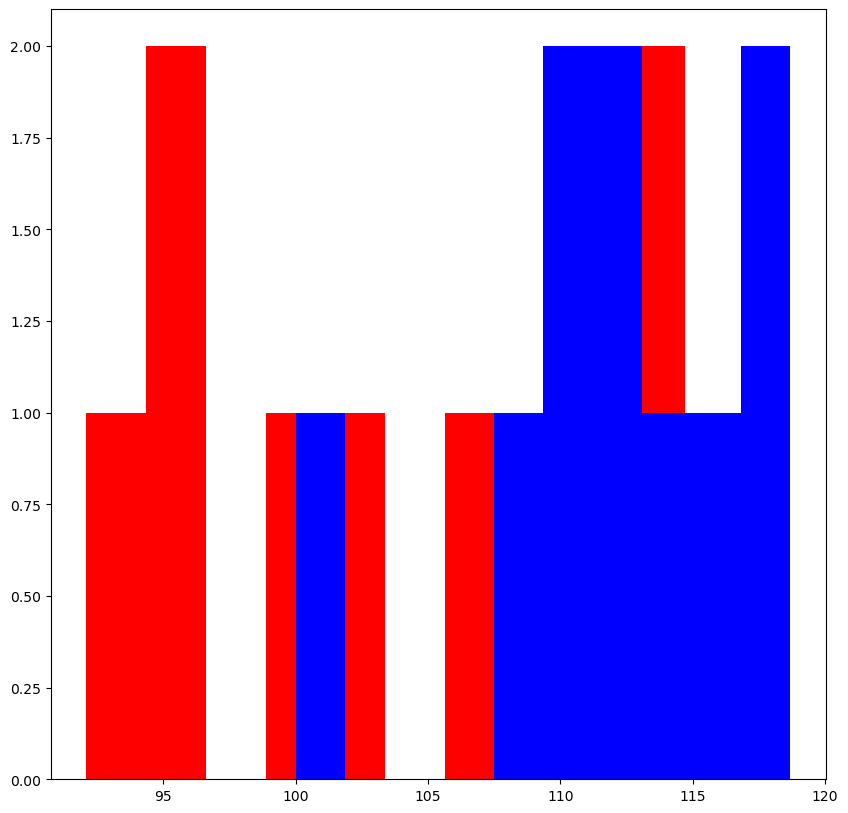

In [112]:
# Plotando o valor máximo
fig = plt.figure(figsize=(10,10))
plt.hist(describe_positives.iloc[-1,:], color='r')
plt.hist(describe_negatives.iloc[-1,:], color='b')
plt.show()

In [113]:
hepatitis = pd.concat([describe_negatives.transpose(), describe_positives.transpose()], axis=0)
y_negative = np.zeros(shape = (describe_negatives.shape[1],), dtype=int)
y_positive = np.ones(shape = (describe_positives.shape[1],), dtype=int)
labels = np.concatenate((y_negative, y_positive), axis = 0)
hepatitis['label'] = labels
hepatitis.drop(['count'], axis=1, inplace=True)


In [114]:
hepatitis.head()

,mean,std,min,25%,50%,75%,max,label
0,2.387736,13.159870,0.005693,0.036582,0.083844,0.333509,109.881546,0
1,2.377383,12.012028,0.042012,0.078390,0.117763,0.647267,100.000191,0
2,2.516692,12.921432,0.045679,0.079435,0.148204,0.540861,107.682762,0
3,2.473245,14.196111,0.005128,0.039721,0.090610,0.462593,118.697556,0
4,2.487154,13.471023,0.044800,0.088341,0.160346,0.401028,112.475105,0


<AxesSubplot:>

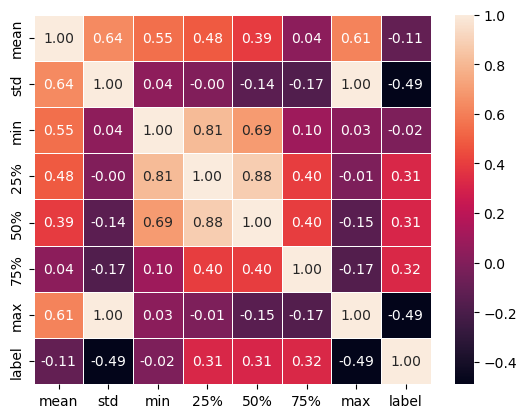

In [115]:
# Importando a Matriz de correlação
import seaborn as sn
correlations = hepatitis.corr()
sn.heatmap(correlations, annot=True, fmt='.2f', linewidths=.6)

In [116]:
hepatitis.to_csv('C:\\Users\\pveso\\Documents\\heart_attack_analysis\\data\\hepatite_fourier.csv')

In [18]:
# Trazendo para a linha de base
for i in range(positives_df.shape[1]):
    positive = positives_df.iloc[:,i]
    negative = negatives_df.iloc[:,i]
    min_p = positive.min()
    min_n = negative.min()
    positives_df.iloc[:,i] = (positive - min_p)
    negatives_df.iloc[:,i] = (negative - min_n)

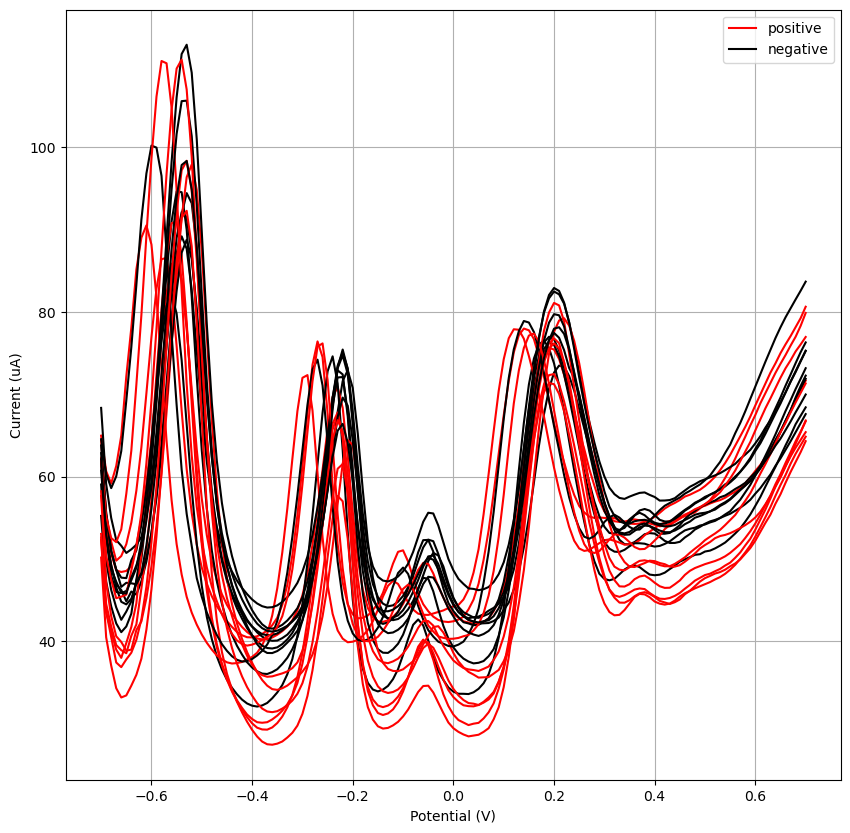

In [18]:
# plotando todos os positivos como vermelho e todos os negativos em preto
plt.figure(figsize=(10,10))
for i in range(positives_df.shape[1]):
    positive = positives_df.iloc[:,i]
    negative = negatives_df.iloc[:,i]
    if (i == 0 ):
        plt.plot(potential_df, positive, color = 'r', label = 'positive')
        plt.plot(potential_df, negative, color = 'black', label = 'negative')
    else:
        plt.plot(potential_df, positive, color = 'r')
        plt.plot(potential_df, negative, color = 'black') 
plt.ylabel('Current (uA)')
plt.xlabel('Potential (V)')
plt.legend()
plt.grid()
plt.show()

In [19]:
# Aplicando min max normalization
for i in range(positives_df.shape[1]):
    positive = positives_df.iloc[:,i]
    negative = negatives_df.iloc[:,i]
    max_p = positive.max()
    min_p = positive.min()
    max_n = negative.max()
    min_n = negative.min()
    positives_df.iloc[:,i] = (positive - min_p) / (max_p - min_p)
    negatives_df.iloc[:,i] = (negative - min_n) / (max_n - min_n)

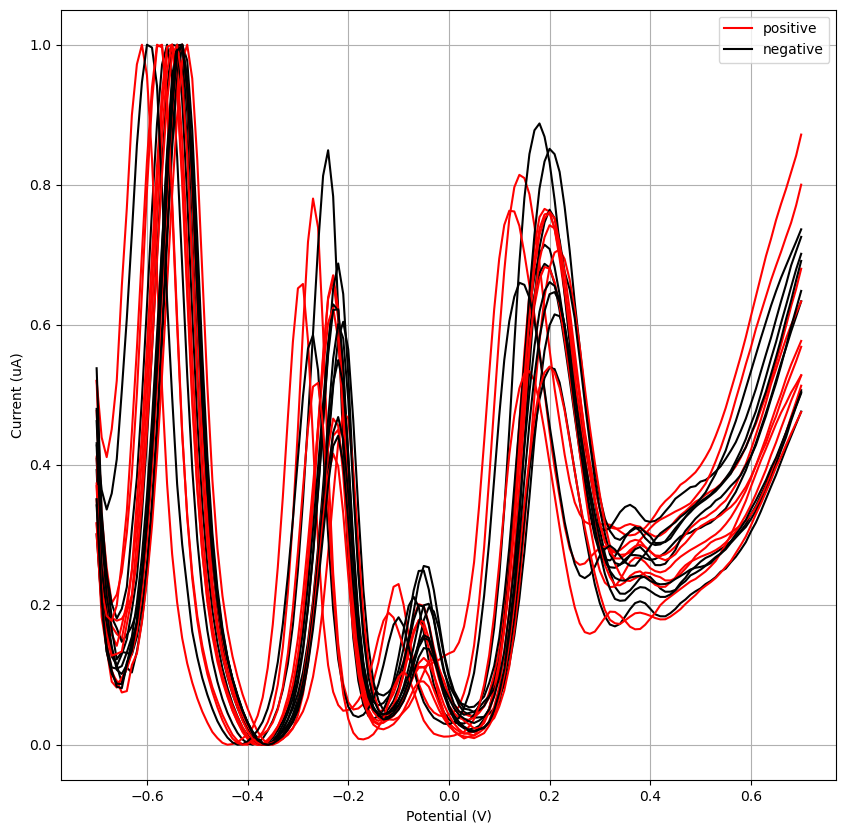

In [20]:
# plotando todos os positivos como vermelho e todos os negativos em preto
plt.figure(figsize=(10,10))
for i in range(positives_df.shape[1]):
    positive = positives_df.iloc[:,i]
    negative = negatives_df.iloc[:,i]
    if (i == 0 ):
        plt.plot(potential_df, positive, color = 'r', label = 'positive')
        plt.plot(potential_df, negative, color = 'black', label = 'negative')
    else:
        plt.plot(potential_df, positive, color = 'r')
        plt.plot(potential_df, negative, color = 'black') 
plt.ylabel('Current (uA)')
plt.xlabel('Potential (V)')
plt.legend()
plt.grid()
plt.show()

In [21]:
# Positive = 1
# Negative = 0

Y = np.concatenate((np.zeros(shape = (1, negatives_df.shape[1])), np.ones(shape = (1, positives_df.shape[1]))), axis = 1)
#Y = np.concatenate((np.zeros(shape = (1, currents_virgin.shape[1])), np.ones(shape = (1, currents_rhodamine.shape[1])), np.zeros(shape = (1, emstat_currents_virgin.shape[1])), np.ones(shape = (1, emstat_currents_rhodamine.shape[1]))), axis = 1)
Y = Y.transpose()
Y.shape

(20, 1)

In [22]:
X = np.concatenate((negatives_df, positives_df), axis = 1)
X = X.transpose()
X.shape

(20, 141)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13, 141)
(13, 1)
(7, 141)
(7, 1)


In [24]:
model = tf.keras.Sequential()

# First convolutional layer
model.add(tf.keras.layers.Conv1D(activation='relu', input_shape = (141, 1), kernel_size=15, filters=8, padding='causal'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
# Second convolutional layer
#model.add(tf.keras.layers.Conv1D(filters=16, kernel_size=7, activation='relu'))
#model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

# Flatten layer to transition from convolutional layers to dense layers
model.add(tf.keras.layers.Flatten())

# Fully connected layers
#model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

# Output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
# Compile the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 141, 8)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 70, 8)             0         
_________________________________________________________________
dropout (Dropout)            (None, 70, 8)             0         
_________________________________________________________________
flatten (Flatten)            (None, 560)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                35904     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
____________________________

In [25]:
model_checkpoint_path = ''
if (isLinux()):
    pass
else:
    model_checkpoint_path = 'C:\\Users\\pveso\\Documents\\heart_attack_analysis\\src\\Hep'
callback = tf.keras.callbacks.ModelCheckpoint(model_checkpoint_path, monitor='val_acc', save_best_only=True, save_weights_only=True, verbose=1, mode = 'max')

In [26]:
# Reshape the data to fit the 1D CNN input shape
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
batch_size = 1
epochs = 500

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs, callbacks = [callback])

Train on 13 samples, validate on 7 samples
Epoch 1/500
 1/13 [=>............................] - ETA: 2s - loss: 0.7010 - acc: 0.0000e+00
Epoch 00001: val_acc improved from -inf to 0.57143, saving model to C:\Users\pveso\Documents\heart_attack_analysis\src\Hep
13/13 [==============================] - 0s 25ms/sample - loss: 0.7220 - acc: 0.3846 - val_loss: 0.6884 - val_acc: 0.5714
Epoch 2/500
 1/13 [=>............................] - ETA: 0s - loss: 0.7384 - acc: 0.0000e+00
Epoch 00002: val_acc did not improve from 0.57143
13/13 [==============================] - 0s 2ms/sample - loss: 0.6857 - acc: 0.5385 - val_loss: 0.6906 - val_acc: 0.5714
Epoch 3/500
 1/13 [=>............................] - ETA: 0s - loss: 0.6595 - acc: 1.0000
Epoch 00003: val_acc did not improve from 0.57143
13/13 [==============================] - 0s 2ms/sample - loss: 0.6870 - acc: 0.6154 - val_loss: 0.6943 - val_acc: 0.5714
Epoch 4/500
 1/13 [=>............................] - ETA: 0s - loss: 0.6476 - acc: 1.0000
Ep

In [27]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_accuracy = history.history['val_acc']

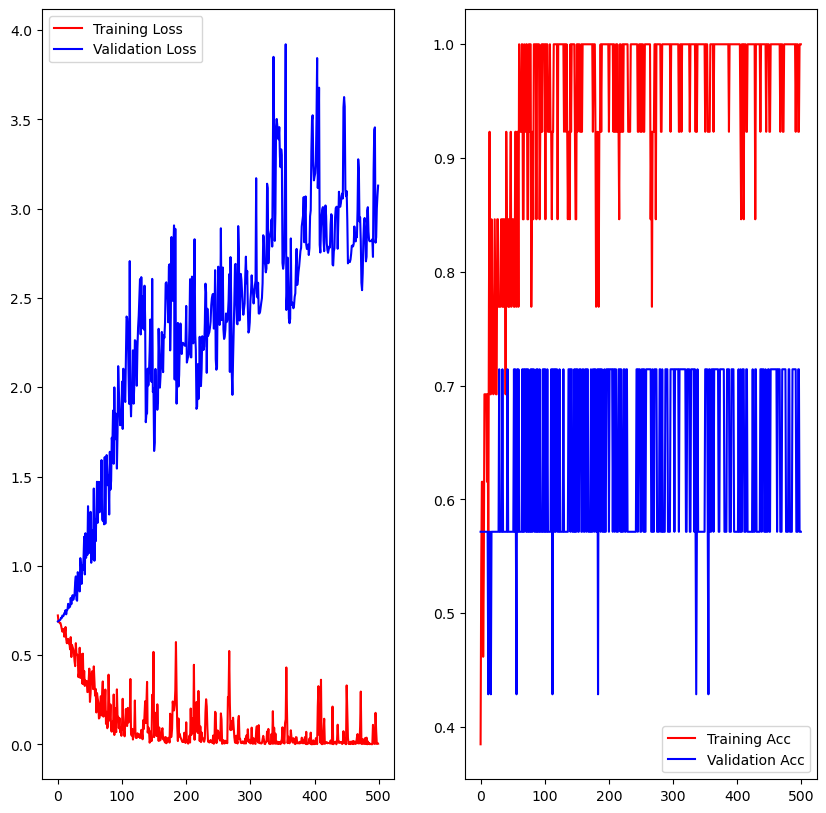

In [28]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = (10,10))
ax0.plot(loss, color = 'r', label = 'Training Loss')
ax0.plot(val_loss, color = 'b', label = 'Validation Loss')
ax1.plot(acc, color = 'r', label = 'Training Acc')
ax1.plot(val_accuracy, color = 'b', label = 'Validation Acc')
ax1.legend()
ax0.legend()
plt.show()

In [29]:
# Matriz confusão
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, RocCurveDisplay, ConfusionMatrixDisplay, roc_curve, auc
model.load_weights(model_checkpoint_path)
y_pred = model.predict(X_test)
y_pred = y_pred >= 0.5
cm = confusion_matrix(y_test, y_pred)

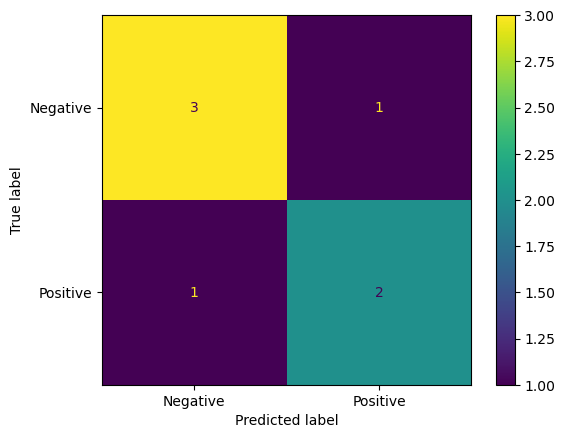

In [30]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive']).plot()

In [31]:
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.6666666666666666
0.7142857142857143


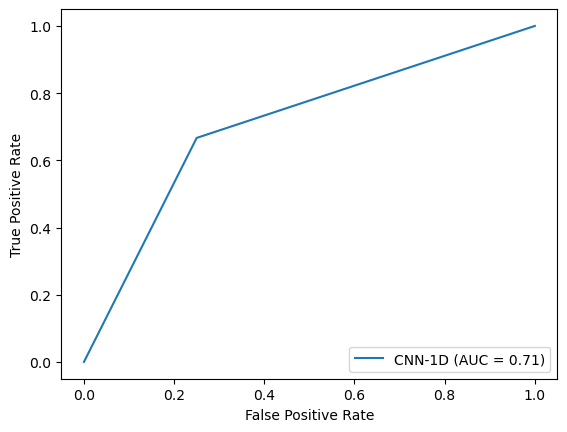

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='CNN-1D')
display.plot()
plt.show()